## KNN Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
bank_df = pd.read_csv('bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4521 non-null object
marital              4521 non-null object
education            4521 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4521 non-null int64
previous-campaign    4521 non-null int64
subscribed           4521 non-null object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [4]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [6]:
from sklearn.utils import resample
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']
df_minority_upsampled = resample(bank_subscribed_yes,replace=True, n_samples=2000)
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [7]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [8]:
new_bank_df.subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [9]:
X_features = list( new_bank_df.columns )
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [10]:
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [15]:
X

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
164,28,80,2,2,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4148,55,538,2,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2717,29,2325,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3000,45,644,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1025,56,1044,2,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,25,808,2,2,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2509,41,0,3,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2808,40,1532,7,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
443,30,1221,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [12]:
encoded_bank_df

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
164,28,80,2,2,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4148,55,538,2,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2717,29,2325,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3000,45,644,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1025,56,1044,2,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,25,808,2,2,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2509,41,0,3,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2808,40,1532,7,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
443,30,1221,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [13]:
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [14]:
Y

164     1
4148    1
2717    1
3000    0
1025    1
       ..
3317    1
2509    0
2808    0
443     1
4441    0
Name: subscribed, Length: 6000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y,test_size = 0.3,random_state = 58 )

In [17]:
import sklearn as sl

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_clf = KNeighborsClassifier()

In [20]:
knn_clf.fit( train_X, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
from sklearn import metrics

In [22]:
def draw_roc_curve( model, test_X, test_y ):
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
    test_results_df.chd_1,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

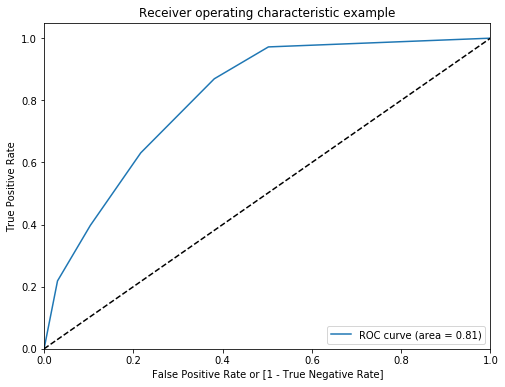

In [23]:
_, _, _, _ = draw_roc_curve( knn_clf, test_X, test_y )

In [24]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Subscribed", "Not Subscribed"] ,
    yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

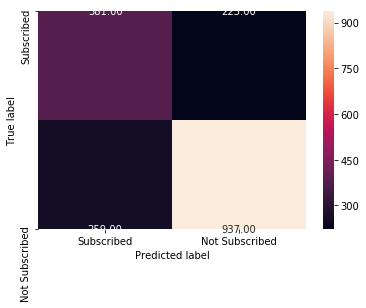

In [25]:
pred_y = knn_clf.predict(test_X)
draw_cm( test_y, pred_y )

In [26]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1196
           1       0.60      0.63      0.61       604

    accuracy                           0.73      1800
   macro avg       0.70      0.71      0.70      1800
weighted avg       0.74      0.73      0.73      1800

